<h1 style = "color:orange;" dir = "ltr"> <b>
    Introduction to Artificial Intelligence
</b> </h1>

<h1 style = "color:orange;" dir = "ltr"> <b>
    CA3 - Hidden Markov Model (HMM)
</b> </h1>

<h1 style = "color:orange;" dir = "ltr"> <b>
    Mahdi Naieni - 810101536 
</b> </h1>

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Introduction
</b> </h1>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Project Summary and Objectives:
</b> </h1>

Hidden Markov Models (HMMs) are pivotal tools in the realms of time signal processing and pattern recognition. These models are characterized by their ability to link each state to a specific state, with the transition probabilities between states being determined by the current state. This characteristic makes HMMs particularly adept for modeling dynamic systems and decision-making under uncertain conditions.

The primary objective of this project is to construct a speech recognition system for numbers, leveraging Hidden Markov Models (HMMs). This endeavor involves a comprehensive process, including pre-processing, feature extraction, model implementation, and analysis, all facilitated by a dataset of audio recordings.

The project's workflow begins with pre-processing the audio data to ensure optimal quality for analysis. This step may involve noise reduction and normalization to prepare the audio signals for feature extraction. Feature extraction is a crucial phase where relevant features, such as Mel Frequency Cepstral Coefficients (MFCCs), are extracted from the audio data. 

The model implementation phase involves configuring the HMM with appropriate parameters, such as the number of hidden states. Once the model is trained, it can be used to decode the sequence of phonemes into words, thereby recognizing the desired number.

The analysis component of the project evaluates the performance of the speech recognition system, assessing its accuracy and efficiency in converting spoken numbers into written text. 

In [1]:
import numpy as np
import random
import os
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm


directory_path = 'recordings'
number_of_digit = 10

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Understanding and Exploring the Dataset:
</b> </h1>

The dataset provided for this project encompasses speech recordings from six distinct speakers, each articulating the numbers 0 through 9, repeated 50 times in English. This rich dataset is instrumental in developing a robust speech recognition system, as it allows for the exploration of various pronunciation styles and accents.

In [2]:
class Audio:
    def __init__(self,audio_path,digit,speaker,sample_num) -> None:
        self.audio_path = audio_path
        self.digit = int(digit)
        self.speaker = speaker
        self.sample_num = int(sample_num)

def get_audio_files(directory_path = 'recordings'):
    audio_files = list()
    speaker_labels = set()
    entries = os.listdir(directory_path)
    for entry in entries:
        if os.path.isfile(os.path.join(directory_path, entry)):
            datas = entry.split(".wav")[0]
            datas = datas.split("_")
            audio_files.append(Audio(os.path.join(directory_path, entry),datas[0],datas[1],datas[2]))
            speaker_labels.add(datas[1])
    return audio_files, list(speaker_labels)

In [3]:
digit_labels = np.arange(number_of_digit)
audio_files, speaker_labels = get_audio_files(directory_path)
print(f"count: {len(audio_files)}")

count: 3000


<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Preprocessing and Feature Extraction
</b> </h1>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Feature Extraction:
</b> </h1>

Feature extraction and selection are pivotal steps in artificial intelligence and machine learning projects, significantly influencing the performance of the final model. In this project, we employ Mel Cepstral Frequency Coefficients (MFCC) for music classification, a technique widely recognized for its effectiveness in music classification and speech recognition tasks.

The process begins by extracting a set of MFCC coefficients for each sample provided. This extraction is facilitated by the `librosa` library, which offers a straightforward method for computing MFCCs. The library's `librosa.feature.mfcc` function is utilized to calculate the MFCCs, as demonstrated in the provided code snippets from the documentation.

After extracting the features, we visualize the distribution of MFCC coefficients for a sample from each category using a heatmap. This visualization aids in understanding the distribution of features across different categories, providing insights into the data's characteristics and potential patterns.

In [26]:
def show_progress_bar(index, num_of_samples, len_bar= 40, start_msg= True, finish_msg= True):
    if index == 0 and start_msg:
        print("Loading data...")
    bar = int((len_bar * (index+1)) / num_of_samples)
    print( '\r' + "|" + u"\u2588" * int(bar) + "-" * (len_bar - bar) + f"| {index+1}/{num_of_samples} [{int(100 * (index+1) / num_of_samples)}%]", end= "")
    if index == num_of_samples-1 and finish_msg:
        print("\n" + "Complete!")
    elif index == num_of_samples-1:
        print()

def extract_mfcc(audio_path, n_mfcc=13, silent_recognition= False):
    y, sr = librosa.load(audio_path)
    if silent_recognition:
        y, _ = librosa.effects.trim(y, top_db=20)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc

def get_mfcc_features(audio_files, digit_labels, speaker_labels):
    features = {digit:[] for digit in digit_labels}
    speaker_features = {speaker:[] for speaker in speaker_labels}
    for i, audio_file in enumerate(audio_files):
        mfcc = extract_mfcc(audio_file.audio_path)
        features[audio_file.digit].append(mfcc)
        speaker_features[audio_file.speaker].append(mfcc)
        show_progress_bar(i,len(audio_files))
    return features, speaker_features

def plot_features(mfccs, title = 'MFCC Features'):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_Zero_Crossing_Rate(zcr, title = 'Zero-Crossing Rate'):
    plt.figure(figsize=(10, 4))
    plt.plot(zcr[0])
    plt.title(title)
    plt.xlabel('Frame')
    plt.ylabel('ZCR')
    plt.show()

Loading data...
|████████████████████████████████████████| 3000/3000 [100%]
Complete!


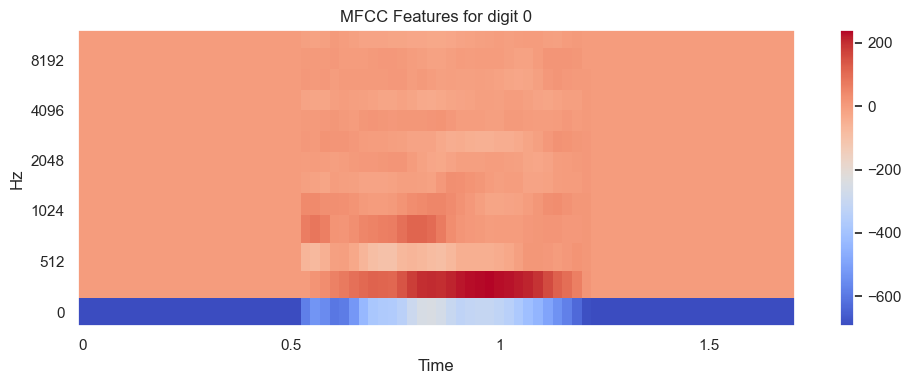

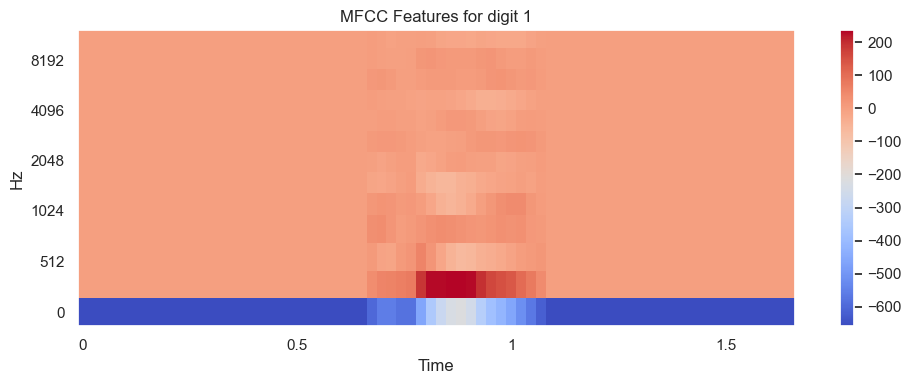

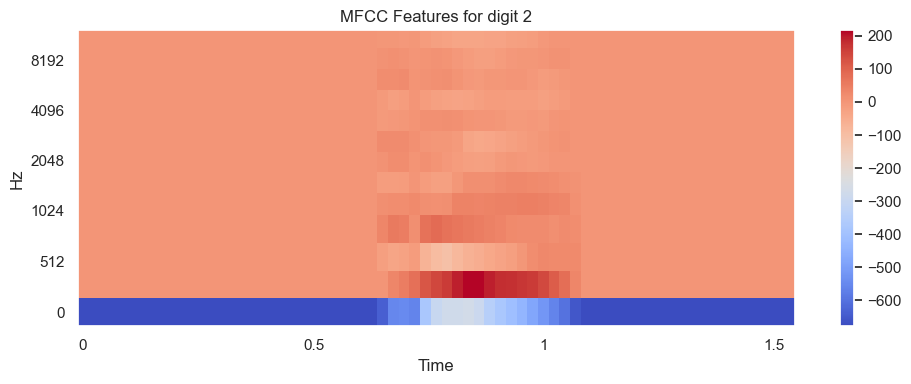

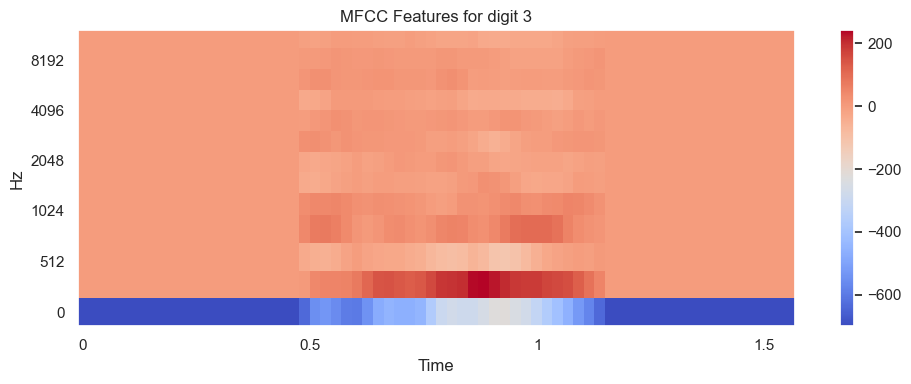

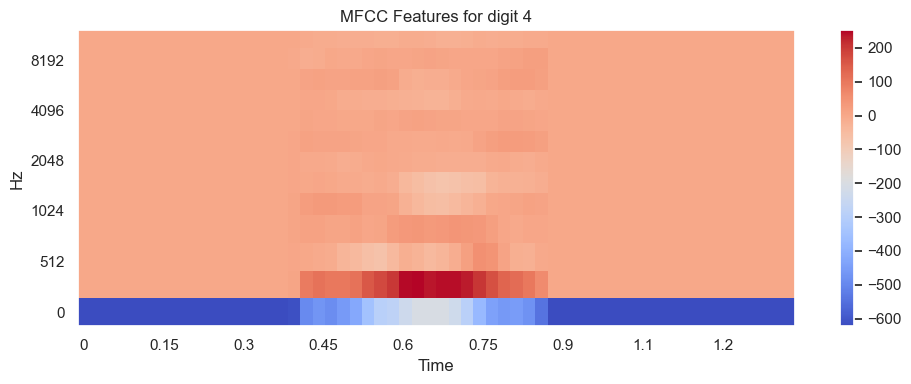

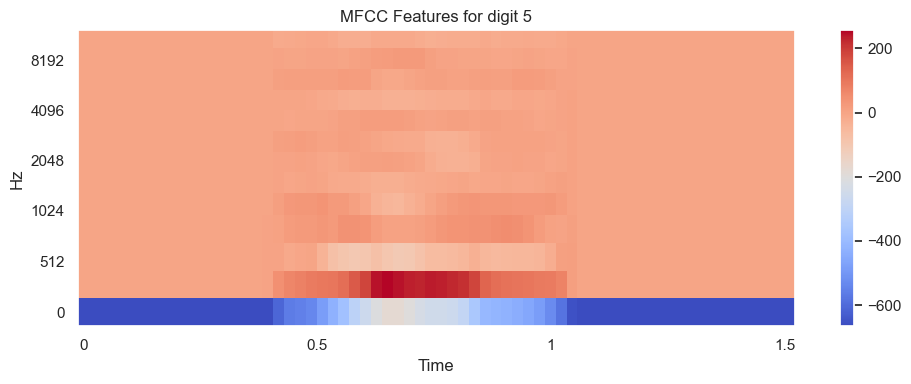

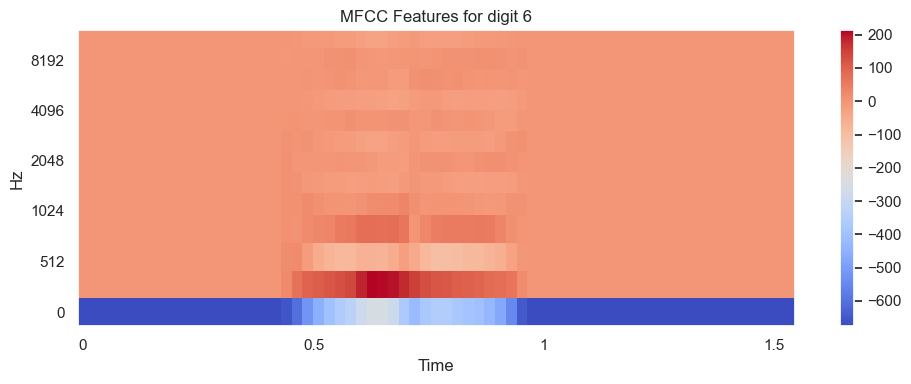

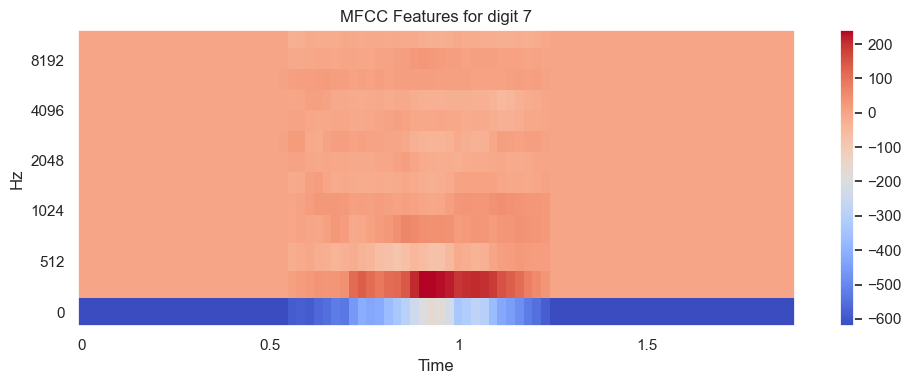

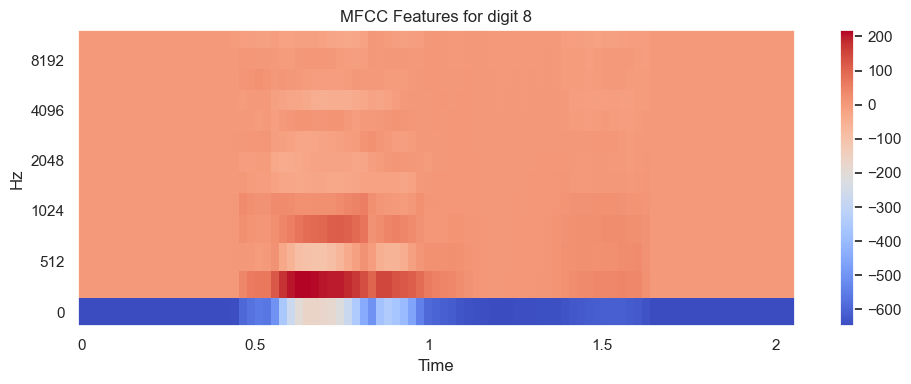

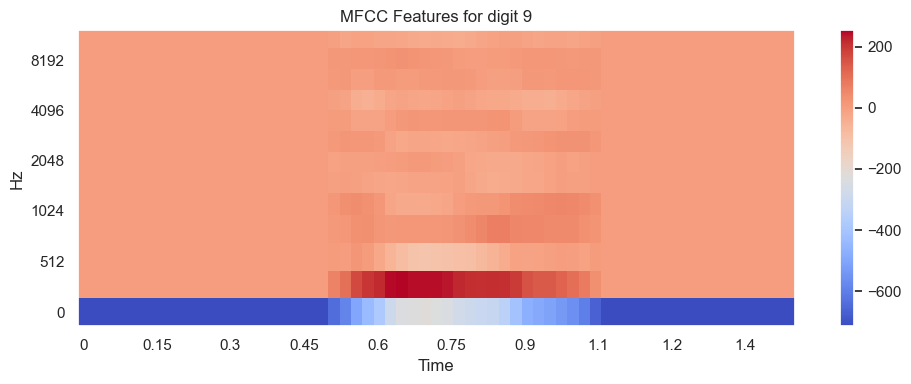

In [27]:
features, speaker_features = get_mfcc_features(audio_files, digit_labels, speaker_labels)
for digit in range(number_of_digit):
    plot_features(features[digit][100], title= f'MFCC Features for digit {digit}')

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Preprocessing:
</b> </h1>

Data preprocessing is a foundational step in any data-driven project, particularly in the realm of artificial intelligence and machine learning. Its primary objective is to enhance the quality of data, making it more suitable for training and testing speech recognition systems. Essential preprocessing steps often include data augmentation, noise removal, signal amplification, normalization, and segmentation. Effective preprocessing is crucial for achieving dependable results and enhancing the overall quality and utility of audio data analysis and modeling.

- **Silence Trimmer**: Trimming silence refers to the process of removing or eliminating the silent parts at the beginning and end of an audio file. This technique is particularly useful in speech and audio processing tasks, such as speech recognition, where the presence of silence can interfere with the accuracy of the recognition process. By trimming silence, the audio data becomes cleaner and more focused on the actual speech content, which can significantly improve the performance of speech recognition models.

- **Repetition Padding**: In the context of audio data preprocessing, refers to the process of extending the duration of audio signals that are shorter than a specified length by repeating certain parts of the signal. This technique is particularly useful when working with audio datasets that require a uniform length for all samples, such as when preparing data for machine learning models. By ensuring that all audio samples have the same duration, repetition padding helps in standardizing the input data, making it more compatible with models that expect fixed-length inputs


In [28]:
def silent_recognition(mfcc):
    start = 0
    break_flag = False
    for i in range(mfcc.shape[1]):
        for j in range(2, mfcc.shape[0]):
            if mfcc[j-1,i] != mfcc[j,i]:
                break_flag = True
        if break_flag: break
        start += 1

    end = mfcc.shape[1]
    break_flag = False
    for i in range(mfcc.shape[1]-1,0,-1):
        for j in range(2, mfcc.shape[0]):
            if mfcc[j-1,i] != mfcc[j,i]:
                break_flag = True
        if break_flag: break
        end -= 1
    
    return mfcc[:, start:end]

def trim_silence(features, labels):
    for label in labels:
        for i, mfcc in enumerate(features[label]):
            features[label][i] = silent_recognition(mfcc)
    return features

def repetition_padding(mfcc, target_length = 75):
    n_repeats = int(np.ceil(target_length / mfcc.shape[1]))  
    repeated_mfcc = np.tile(mfcc, (1 ,n_repeats))  
    padded_mfcc = repeated_mfcc[:,:target_length]
    return padded_mfcc

def find_target_lengths(features, labels, Percentage= 0.8, increase_factor = 1):
    target_lengths = dict()
    for label in labels:
        lengths = [mfcc.shape[1] for mfcc in features[label]]
        lengths.sort()
        index = int(Percentage*len(lengths))
        target_lengths[label] = increase_factor * lengths[index]
    return target_lengths

def equalize_lengths(features, labels, target_lengths):
    for label in labels:
        for i, mfcc in enumerate(features[label]):
            features[label][i] = repetition_padding(mfcc, target_lengths[label])
    return features

In [29]:
features = trim_silence(features,digit_labels)
target_lengths = find_target_lengths(features,digit_labels,0.8,7)
features = equalize_lengths(features, digit_labels, target_lengths)
target_lengths = find_target_lengths(speaker_features,speaker_labels,0.8,4)
speaker_features = equalize_lengths(speaker_features, speaker_labels, target_lengths)

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Train Test Split:
</b> </h1>

The process of splitting the dataset into training and test sets, followed by normalization, is a critical step in preparing data for machine learning models. This approach ensures that the model is trained on a representative sample of the data and then tested on unseen data, providing a more accurate assessment of its performance.

The recommended method involves using the `train_test_split` function from scikit-learn to divide the dataset into training and testing sets. This function allows for the specification of the test set size and ensures reproducibility by setting a random seed. Following the split, normalization is applied to both the training and test sets to ensure that the model's input features are on a comparable scale. 

In [30]:
def split_train_and_test(features, labels):
    data = features.copy()
    train_data = dict()
    test_data = {label:[] for label in labels}
    
    for label in labels:
        test_size = int(0.2*len(data[label]))
        train_features, test_features = train_test_split(data[label], test_size=test_size, random_state=20)
        for test in test_features:
            test_data[label].append(normalize(test, axis=0))
        train_data[label] = normalize(np.concatenate(train_features, axis=1), axis=0)
    
    return train_data, test_data

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Questions:
</b> </h1>

1- Do you think data segmentation is useful for this dataset? Why?

Yes, data segmentation can be useful for this dataset, here's why:

- **Enhanced Comprehension and Analysis**: Data segmentation organizes data into distinct groups based on various attributes, making it easier to understand and analyze large datasets.

- **Improved Model Training**: By segmenting the audio at the start and end of each number spoken, you can ensure the model focuses only on the relevant speech portion. This eliminates background noise, silence, or other speakers present in the recording and allows the model to learn the acoustic characteristics of each number more effectively.

- **Reduced Training Time**:  Training an HMM on the entire audio file, including silence, can be computationally expensive and time-consuming. Segmentation removes irrelevant portions, leading to faster training times.

---------------------------------

2- Audio content offers a wealth of features that can be extracted, each providing unique insights. Key among these are Mel-Frequency Cepstral Coefficients (MFCC), Zero-Crossing Rate, Spectrogram-Mel, and Chroma features. Research each of these characteristics and explain the relationships between them?

- **Mel-Frequency Cepstral Coefficients (MFCC)**: MFCCs represent the envelope of the sound's power spectrum on a mel scale, which approximates human auditory perception. It focuses on how much energy is present in different frequency bands perceived as similar by the human ear.

- **Zero-Crossing Rate (ZCR)**: ZCR is a simple feature that counts how many times the audio signal crosses the zero amplitude line in a specific timeframe. It provides a basic measure of the signal's rapidity. A high zero-crossing rate indicates the absence of a dominant low-frequency oscillation, which is useful for distinguishing between voiced and unvoiced speech.

- **Spectrogram-Mel**: A spectrogram is a visual representation of the frequency content of an audio signal over time. Mel Spectrogram is a specific type of spectrogram where the frequency axis is transformed to the mel scale, similar to MFCCs. It provides a more detailed view of how the power of the sound is distributed across frequencies over time.

- **Chroma Features**: Chroma features, also known as pitch class profiles, are based on the twelve different pitch classes and are particularly effective in music genre classification and music recommendation. they represent the short-term power distribution in the chromagram.

Relationship between the features:

- **MFCC vs. Spectrogram-Mel**:  MFCC can be derived from the Mel Spectrogram. The spectrogram offers a rich visual representation, while MFCCs are a compressed version focusing on perceptually important information.

- **ZCR vs. MFCC & Spectrogram-Mel**: ZCR offers a basic measure of the signal's rapidity, while MFCCs and spectrograms capture the distribution of energy across frequencies. While related, they provide information from different perspectives.

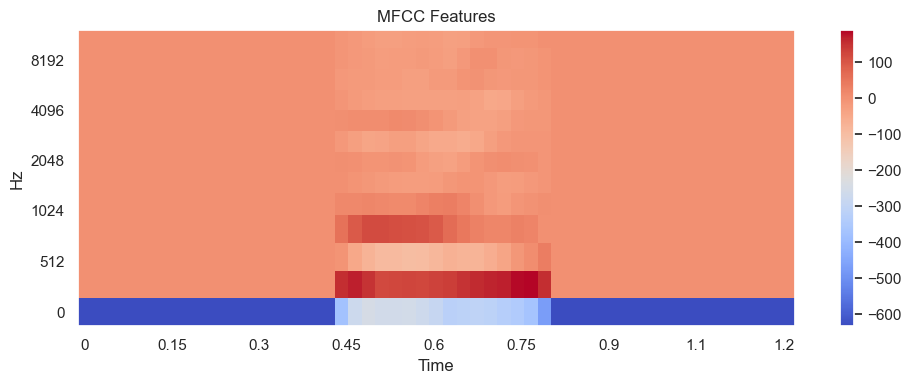

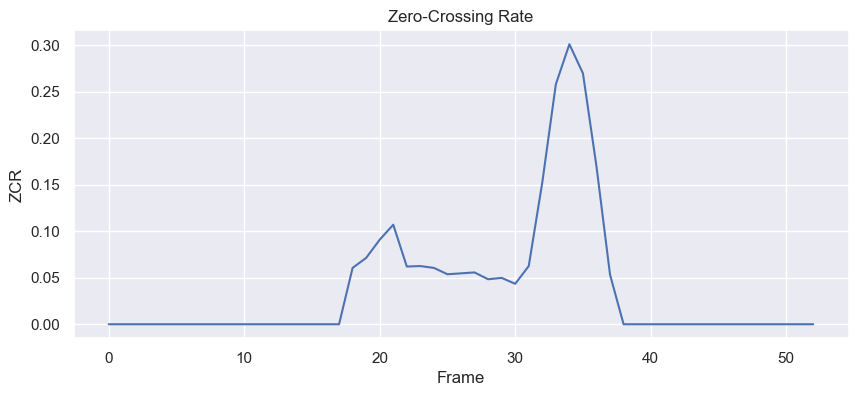

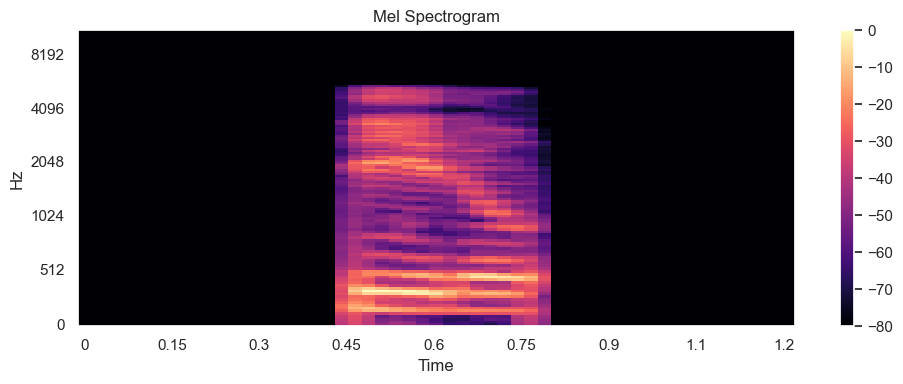

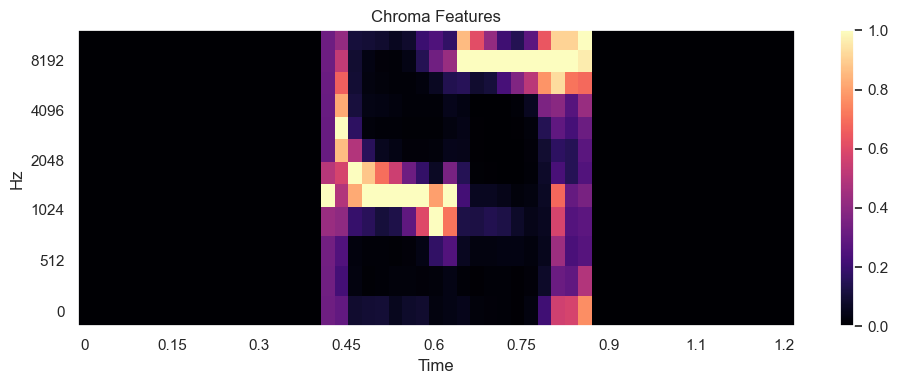

In [31]:
y, sr = librosa.load(os.path.join(directory_path, "0_george_0.wav"))

mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
zcr = librosa.feature.zero_crossing_rate(y)
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

plot_features(mfcc, title= 'MFCC Features')
plot_Zero_Crossing_Rate(zcr, title = 'Zero-Crossing Rate')
plot_features(mel_spectrogram_db, title= 'Mel Spectrogram')
plot_features(chroma, title= 'Chroma Features')



---------------------------------

3- Evaluate the robustness and sensitivity of MFCC characteristics to variations in audio signals?

Here's an evaluation of their robustness and sensitivity in the context number speech recognition system:

- **Robustness**:

    - **Speaker Independence**:  MFCCs focus on the mel-scale power spectrum shape, which is less sensitive to speaker variations like vocal tract length and pitch. This allows the model to recognize the same number spoken by different speakers in my dataset (6 speakers).

    - **Background Noise Reduction**:  Preprocessing steps like Mel filtering can suppress some background noise. This is particularly helpful for low-level environmental noise.

- **Sensitivity**:

    - **High-Frequency Noise**:  MFCCs primarily focus on lower and mid-frequency ranges. High-frequency noise can alter the power spectrum in these regions, potentially causing misinterpretations, especially for numbers with similar spectral characteristics in the lower frequencies (For example, "one" and "three").

    - **Extreme Volume Changes**: Very loud or quiet recordings can compress or expand the dynamic range of the audio, significantly affecting the power spectrum shape and potentially leading to inaccurate MFCCs.

---------------------------------

4- Are there specific cases where MFCC coefficients are less efficient?

- **High-Frequency Content Speech**:  MFCCs focus on the mel-frequency scale, which emphasizes lower and mid-frequency information. If your dataset includes numbers spoken with a significant emphasis on high frequencies (For example, whispering, sounds with prominent sibilance like "five" or "seven"), MFCCs might not capture enough detail for accurate recognition.

- **Rapid Speech**:  MFCC extraction typically uses windowing techniques to analyze short segments of the audio signal. For very rapid speech, these windows might capture transitions between sounds rather than the stable features of each digit. This can lead to confusion, especially for numbers with similar acoustic characteristics in the captured windows.

- **Heavy Noise with Specific Frequency Masking**:  While MFCCs offer some noise reduction through Mel filtering, if the background noise has a dominant frequency range that overlaps with the crucial information for certain digits, MFCCs might not be able to completely separate the speech signal from the noise. This can be problematic for numbers with spectral characteristics that lie within the masked frequency range.

---------------------------------

5- Why do the frames utilized in the computation of MFCC coefficients overlap with one another?

- **Minimizing Spectral Leakage**: Overlapping frames help minimize spectral leakage, which occurs when the signal at the window boundaries is almost neglected. A windowing function is applied to each frame to reduce this leakage, but overlapping frames ensures that at least 50% of the signal is covered by the next frame, preserving information that would otherwise be lost. 

- **Enhancing Redundancy in MFCCs**: Overlapping frames introduce redundancy in the MFCCs, which can be exploited in improved delta-MFCCs and delta-delta-MFCCs computation.

---------------------------------

6- Why are only 12 or 13 basic MFCC coefficients used in most audio-related projects?

- **Focus on Perceptually Relevant Information**:  Human hearing is more sensitive to changes in lower frequencies compared to higher frequencies. MFCCs are designed to mimic this perception by using a mel scale that emphasizes information in lower and mid-frequency ranges.  The first 12-13 coefficients capture the most important spectral variations for speech recognition within this perceptually relevant region.

- **Computational Efficiency**:  Extracting a large number of MFCC coefficients increases the computational cost. By limiting the number of coefficients to a smaller set that captures the essential information, the overall processing speed is improved. 

- **Redundancy in Higher Coefficients**:  Higher-order MFCC coefficients often capture finer details in the spectrum that might not be as crucial for distinguishing speech sounds, especially for isolated digits. These higher coefficients can also introduce redundancy with the lower-order ones. Focusing on the first 12-13 coefficients provides a good balance between capturing essential information and avoiding unnecessary computational complexity.

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Introduction to HMM
</b> </h1>


<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Hidden Markov Model:
</b> </h1>

Modeling with Hidden Markov Models (HMMs) is a powerful statistical approach for analyzing time-series data, particularly useful for tasks such as speech recognition and pattern recognition. HMMs are composed of several key components that work together to model sequences of data:

- **States**: These are the hidden variables that represent the underlying process generating the observed data.
- **Observations**: These are the observable data points that are generated by the hidden states. For instance, in speech recognition, observations would be the acoustic features of the speech signal.
- **Transition Probabilities**: These probabilities define the likelihood of transitioning from one state to another. They capture the temporal dependencies between states, allowing the model to predict the sequence of states given a sequence of observations.
- **Emission Probabilities**: These probabilities represent the likelihood of observing a particular observation given a specific state. They capture the relationship between states and observations, enabling the model to predict the sequence of observations given a sequence of states.

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Questions:
</b> </h1>

1- Clarify the concepts of "States" and "Observations" and identify the states in this exercise? Explain how observations are obtained?

- **States**: HMMs represent a system with hidden states that we cannot directly observe. These states correspond to the different stages or conditions the system might be in at any given time. In the context of my system, the hidden states are likely to represent the different digits (0-9) being spoken. The model does not directly observe the spoken digit but instead analyzes audio features to infer the underlying hidden state, which corresponds to the digit. This approach involves tracking more complex features than those initially calculated.

- **Observations**: Observations are the measurable outputs you can obtain from the system. They provide clues about the underlying hidden states. In my case, the observations are the features extracted from the audio signal. These features are MFCCs (Mel-Frequency Cepstral Coefficients) that capture characteristics of the speech sound.

The process of obtaining observations involves feature extraction from the audio data:

1. **Preprocessing**: The audio signal is first preprocessed to remove noise and prepare it for further analysis.

2. **Feature Extraction**: Algorithms like MFCC computation are applied to short segments of the preprocessed audio. These algorithms extract features that represent the spectral characteristics of the sound within that segment.

3. **Sequence of Feature Vectors**: This process is repeated for multiple short segments across the entire audio recording, resulting in a sequence of feature vectors. Each vector represents the features extracted from a specific time window of the audio.

---------------------------------

2- HMM models can be categorized based on the degree of interdependence between hidden states. For this exercise, you will implement a First-Order HMM model. Investigate the rationale behind its name, its features, and how it differs from other models in its category?

- **First-Order HMM**: This model is named as such because it considers the immediate previous state when transitioning to the next state, making it a "first-order" model in terms of its temporal dependencies in other words, the model considers the immediate past but forgets any states before that.

- **Features**: The first-order Hidden Markov Model (HMM) incorporates several key features:

    - **Transition Probabilities**: These probabilities determine the likelihood of transitioning from one state to another. In a first-order model, these transitions are solely dependent on the preceding state, adhering to the Markov property where the future state depends only on the current state and not on the sequence of events that preceded it.

    - **Emission Probabilities**: These probabilities quantify the likelihood of observing specific features or audio descriptors given the current state. They are crucial for understanding how the model predicts the output based on the hidden state

- **Comparison with other HMM**s: The First-Order HMM differs from other models in the HMM family in its simplicity and computational efficiency. Unlike higher-order models, which consider multiple previous states when transitioning, the First-Order HMM only considers the immediate previous state. This makes it computationally less intensive and more suitable for applications where the temporal dependencies are not too complex. However, this simplicity can also limit its ability to capture more complex patterns in the data compared to higher-order models.

---------------------------------

3- Research about Hidden Markov Models (HMMs) and explain what phenomena this model is suitable for analyzing. Explain why this topic is important?

Hidden Markov Models (HMMs) are a powerful statistical method used for modeling systems with hidden states – states that cannot be directly observed but can be inferred from a sequence of observations.  They are particularly well-suited for analyzing phenomena that exhibit the following characteristics:

- **Underlying Hidden States**: The system being studied should have a set of underlying states that are not directly observable. These states could represent different conditions, phases, or modes of operation.

- **Emission Probabilities**: There should be a connection between the hidden states and the observable outputs (observations). Each hidden state has a probability of emitting a specific observation or a specific type of observation.

- **Sequential Dependence**:  The observations often occur in a sequence, and the probability of observing a particular element in the sequence depends on the state of the system at the previous time step(s).

Here are some examples of phenomena where HMMs excel due to these characteristics:

- **Speech Recognition**:  In speech recognition, the hidden states represent the different phonemes or words being spoken. The observations are the features extracted from the audio signal (e.g., MFCCs). HMMs can analyze the sequence of features and infer the most likely sequence of hidden states (spoken words).

- **Part-of-Speech Tagging**:  In natural language processing, HMMs can be used to tag words in a sentence with their part-of-speech (e.g., noun, verb). The hidden states represent different parts of speech, and the observations are the words themselves. The model considers the sequence of words and assigns the most likely part-of-speech tag to each one.

- **Gesture Recognition**:  In gesture recognition, HMMs can be used to analyze sequences of body movements or sensor data to recognize gestures. The hidden states represent different stages of the gesture, and the observations are the sensor readings at each point in time.

- **Gene Prediction in DNA Sequences**:  HMMs can be used to identify coding and non-coding regions in DNA sequences. The hidden states represent the different functional regions of the DNA, and the observations are the individual nucleotides (A, C, G, T).

- **Financial Market Modeling**:  HMMs can be used to model stock price movements or other financial data. The hidden states represent different market conditions, and the observations are the daily or hourly price changes.

Why HMMs are Well-Suited:

- **Hidden State Inference**: HMMs excel at inferring the most likely sequence of hidden states that generated a given sequence of observations. They can analyze the emission probabilities and state transition probabilities to make these inferences, even though the hidden states themselves are not directly observable.

- **Sequential Data Analysis**:  HMMs are specifically designed to handle sequential data, where the order of observations matters. They can capture the dependencies between observations in a sequence and use this information to make better predictions or classifications.

- **Flexibility**: HMMs can be adapted to various applications by defining appropriate hidden states, emission probabilities, and transition probabilities specific to the problem being addressed.

---------------------------------

4- The HMM model, like any other model, has its own set of advantages and disadvantages that make it unique. Let's briefly discuss each of these aspects?

Advantages of HMMs:

- **Effective for Hidden States**: HMMs are effective for modeling systems with hidden states, making them ideal for tasks like speech recognition, where the underlying spoken words are not directly observable but can be inferred from audio signals.

- **Sequential Data Analysis**: HMMs are tailored for sequential data, where the sequence's order is crucial. They effectively capture dependencies between sequence elements and utilize this information for predicting the next element.

- **Fast Processing**: HMMs can process large amounts of data quickly, making them suitable for real-time applications where speed is crucial.

- **Scalability**: They can handle a wide range of data sizes, from small datasets to large-scale data analysis tasks.

- **Flexibility**: HMMs can be adapted to various types of data and problems, making them a versatile tool in many fields.

- **Usability**: They are relatively easy to implement and use, especially with the availability of libraries and tools that support HMMs.

- **Integration**: HMMs can be integrated into existing systems and workflows, allowing for seamless data analysis and processing.

Disadvantages of HMMs:

- **Limited State Representation**: HMMs assume a fixed set of hidden states. If the true underlying system has a more complex structure or variable-length states, an HMM might not be able to capture these complexities accurately.

- **Training Data Requirements**:  HMMs can require a significant amount of training data to learn the emission probabilities and transition probabilities effectively. This can be a challenge for tasks where labeled data is scarce.

- **Independence Assumption**:  First-order HMMs assume that the probability of the current state depends only on the previous state. This might be a limitation for tasks where longer-range dependencies between states exist. Higher-order HMMs can address this, but they come with increased complexity.

- **Quality of Output**: The quality of the output generated by HMMs can vary significantly, depending on the complexity of the input data and the specifics of the model configuration.

- **Consistency**: Achieving consistent results across different datasets or scenarios can be challenging, as the performance of HMMs can be sensitive to the choice of parameters and the structure of the model.

---------------------------------

5- There are various types of Hidden Markov Models (HMMs), research them and briefly discuss a few?

- **Ergodic HMM**: This is the most general type of HMM where any state can transition to any other state, including itself.  There are no restrictions on the transition probabilities between states.

- **Left-Right HMM**: In left-right HMMs, the states are ordered, and transitions can only happen from a state to its immediate successor or itself. The model progresses left to right through the state sequence, reflecting a linear progression in the observations.

- **Hidden Semi-Markov Model (HSMM)**: An extension of the standard HMM, HSMMs introduce durations for hidden states. Each hidden state can now have a variable duration, allowing the model to capture the length of time spent in each state.

- **Continuous-State HMM**: Unlike standard HMMs with discrete states, continuous-state HMMs allow for a continuous range of hidden states. The state space is no longer limited to a finite set of values.

- **Switching HMM**: Switching HMMs allow the model to switch between different sub-models based on control or latent variables, each representing a unique behavior or pattern within the data. This adaptability makes them ideal for complex data with multiple states or behaviors, providing a robust tool for analyzing and predicting varied sequences of events.

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Implementation of the problem
</b> </h1>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Implementing with Libraries:
</b> </h1>

In the initial phase of our project, we focus on designing and implementing an Hidden Markov Model (HMM) using the `hmmlearn` library. This library provides a comprehensive set of tools for working with HMMs. 

The `hmmlearn` library supports three types of emission models out of the box: 
- multinomial 
- Gaussian
- Gaussian mixture

After designing the HMM model, we proceed to train it on our dataset. 

In [12]:
# train
def train_by_hmm_library(train_data, labels, cov_type):
    hmm_library_models = dict()

    for i, label in enumerate(labels):
        hmm_model = hmm.GaussianHMM(n_components= 5, covariance_type=cov_type)
        hmm_model.fit(train_data[label].T)
        hmm_library_models[label] = hmm_model
        show_progress_bar(i, len(labels), start_msg=False)

    return hmm_library_models

# test
def test_by_hmm_library(test_data, hmm_library_models, labels):
    size = 0
    len_bar = 0
    real_labels = list()
    for label in labels:
        real_labels.extend([label] * len(test_data[label]))
        len_bar += len(test_data[label])

    hmm_library_predictions = list()
    for i, label in enumerate(labels):
        for index, test in enumerate(test_data[label]):
            scores = {x:hmm_library_models[x].score(test.T) for x in labels}
            hmm_library_predictions.append(max(scores, key=lambda x: scores[x]))
            show_progress_bar(i*size+index, len_bar, start_msg=False)
        size = len(test_data[label])
    
    return real_labels, hmm_library_predictions

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Implementing from Scratch:
</b> </h1>

The Hidden Markov Model (HMM) class employs the forward (alpha) and backward (beta) algorithms to iteratively refine its parameters. At each iteration, the transition matrix, mean, and covariance are updated. Subsequently, these updated mean and covariance values are utilized to adjust the emission probability. This process allows the HMM to dynamically adapt to the observed data, improving its ability to model sequences over time.

Our model is integrated into the training process, utilizing a cycle of estimation and maximization to enhance the likelihood of observing the model's predictions.

Finally, utilizing the score method, we determine the probability of observing a specific outcome within the model. This approach allows us to quantify the likelihood of each observation, providing a clear measure of how well the model predicts the data it encounters.

In [13]:
class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                alpha[:, t] = np.multiply(self.initial_prob.flatten(), observation_matrix[:, t])
            else:
                alpha[:, t] = np.multiply(np.dot(self.transition_matrix, alpha[:, t-1]), observation_matrix[:, t])

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            beta[:, t] = np.multiply(np.dot(self.transition_matrix, observation_matrix[:, t+1]), beta[:, t+1])
            beta[:, t] /= np.sum(beta[:, t])

        return beta
    
    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            B[s, :] = stats.multivariate_normal.pdf(obs.T, mean=self.mean[:, s], cov=self.covariances[:, :, s])

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self
    
    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs)

        log_likelihood, alpha = self. _forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            partial_sum = np.multiply(np.multiply(alpha[:, t], self.transition_matrix), np.multiply(B[:, t+1], beta[:, t+1]))
            xi_sum += self._normalize(partial_sum)
            partial_g = np.multiply(alpha[:, t], beta[:, t])
            gamma[:, t] = self._normalize(partial_g)
        partial_g = np.multiply(alpha[:, -1], beta[:, -1])
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = gamma[:, 0]
        expected_transition = self._stochasticize(xi_sum)

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        # self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=1):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood

In [14]:
# train
def train_by_HMM_scr(train_data, labels, num_hs, num_iter):
    hmm_scratch_models = dict()

    for i, label in enumerate(labels):
        hmm_model = HMM(num_hidden_states= num_hs)
        hmm_model.train(train_data[label], num_iterations= num_iter)
        hmm_scratch_models[label] = hmm_model
        show_progress_bar(i, len(labels), start_msg=False)

    return hmm_scratch_models


# test
def test_by_HMM_scr(test_data, hmm_scratch_models, labels):
    size = 0
    len_bar = 0
    real_labels = list()
    for label in labels:
        real_labels.extend([label] * len(test_data[label]))
        len_bar += len(test_data[label])

    hmm_scratch_predictions = list()
    for i, label in enumerate(labels):
        for index, test in enumerate(test_data[label]):
            scores = {x:hmm_scratch_models[x].score(test) for x in labels}
            hmm_scratch_predictions.append(max(scores, key=lambda x: scores[x]))
            show_progress_bar(i*size+index, len_bar, start_msg=False)
        size = len(test_data[label])

    return real_labels, hmm_scratch_predictions

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Evaluation and analysis
</b> </h1>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Essential Functions for Model Evaluation and Analysis:
</b> </h1>

In the future, we will employ the below functions such as Accuracy, Precision, Recall, and F1 Score calculations to evaluate and analyze the model's performance. These metrics will not only provide a comprehensive understanding of the model's effectiveness but also pinpoint critical areas for enhancement.

In [15]:
def get_confusion_matrix(true_labels, predicted_labels, labels):
    label_index = {label:i for i, label in enumerate(labels)}
    cm = np.zeros((len(labels), len(labels)), dtype=int)
    
    for true_label, predicted_label in zip(true_labels, predicted_labels):
        cm[label_index[true_label], label_index[predicted_label]] += 1

    return cm

def plot_heatmap(confusion_matrix, labels):
    sns.set_theme() 
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

def calculate_accuracy(confusion_matrix, class_index):
    TP = confusion_matrix[class_index, class_index]   # True Positives
    TN = np.diag(confusion_matrix).sum() - TP         # True Negatives
    FP = confusion_matrix[:, class_index].sum() - TP  # False Positives
    FN = confusion_matrix[class_index, :].sum() - TP  # False Negatives

    return (TP + TN) / (TP + TN + FP + FN)

def calculate_precision(confusion_matrix, class_index):
    TP = confusion_matrix[class_index, class_index]   # True Positives
    FP = confusion_matrix[:, class_index].sum() - TP  # False Positives

    return TP / (TP + FP)

def calculate_recall(confusion_matrix, class_index):
    TP = confusion_matrix[class_index, class_index]   # True Positives
    FN = confusion_matrix[class_index, :].sum() - TP  # False Negatives

    return TP / (TP + FN)

def calculate_F1_score(confusion_matrix, class_index):
    precision = calculate_precision(confusion_matrix, class_index)
    recall = calculate_recall(confusion_matrix, class_index)

    return 2 * (precision * recall) / (precision + recall) 

def calculate_micro_accuracy(confusion_matrix):
    true_positives = sum(diag for diag in np.diag(confusion_matrix))
    total_elements = np.sum(confusion_matrix)

    return true_positives / total_elements

def calculate_micro_precision(confusion_matrix):
    true_positives = np.diag(confusion_matrix).sum()
    lower_triangle_indices = np.tril_indices_from(confusion_matrix, k=-1)
    false_positives = np.sum(confusion_matrix[lower_triangle_indices])

    return true_positives / (true_positives + false_positives)

def calculate_micro_recall(confusion_matrix):
    true_positives = np.diag(confusion_matrix).sum()
    upper_triangle_indices = np.triu_indices(confusion_matrix.shape[0], k=1)
    false_negatives = np.sum(confusion_matrix[upper_triangle_indices])

    return true_positives / (true_positives + false_negatives)

def calculate_micro_f1_score(confusion_matrix):
    precision_micro = calculate_micro_precision(confusion_matrix)
    recall_micro = calculate_micro_recall(confusion_matrix)

    return 2 * (precision_micro * recall_micro) / (precision_micro + recall_micro)

def calculate_macro(confusion_matrix, labels, function):
    data = [function(confusion_matrix, i) for i, label in enumerate(labels)]
    return np.mean(data)

def evaluating_performance_of_models(confusion_matrix, labels):
    print(f"class\t  |\tAccuracy\tPrecision\tRecall\t\tF1 Score")
    print("---------------------------------------------------------------------------")
    for index, label in enumerate(labels):
        accuracy = calculate_accuracy(confusion_matrix, index)
        precision = calculate_precision(confusion_matrix, index)
        recall = calculate_recall(confusion_matrix, index)
        f1_Score = calculate_F1_score(confusion_matrix, index)
        gap = "\t" if len(str(label)) < 8 else ""
        print(f"{label}{gap}  |\t{accuracy:.2f}\t\t{precision:.2f}\t\t{recall:.2f}\t\t{f1_Score:.2f}")

    print("\n")
    print(f"criteria  |\tMicro Avg\tMacro Avg")
    print("--------------------------------------------")
    print(f"Precision |\t{calculate_micro_precision(confusion_matrix):.2f}\t\t{calculate_macro(confusion_matrix,labels,calculate_precision):.2f}")
    print(f"Recall\t  |\t{calculate_micro_recall(confusion_matrix):.2f}\t\t{calculate_macro(confusion_matrix,labels,calculate_recall):.2f}")
    print(f"F1 score  |\t{calculate_micro_f1_score(confusion_matrix):.2f}\t\t{calculate_macro(confusion_matrix,labels,calculate_F1_score):.2f}")

    print("\n")
    print(f"Accuracy: {calculate_micro_accuracy(confusion_matrix):.2f}")

def create_bar_plot(cm_dict, func, label):
    accuracy_library = {"digitLabel": func(cm_dict["digit_lib"]), "speakerName": func(cm_dict["speaker_lib"])}
    accuracy_scratch = {"digitLabel": func(cm_dict["digit_scr"]), "speakerName": func(cm_dict["speaker_scr"])}

    barWidth = 0.20
    br1 = np.arange(len(accuracy_library))
    br2 = [x + barWidth for x in br1]

    plt.bar(br1, accuracy_library.values(), color='green', width=barWidth, edgecolor='black', label='library')
    plt.bar(br2, accuracy_scratch.values(), color='orange', width=barWidth, edgecolor='black', label='scratch')

    plt.xlabel('target variable', fontweight='bold', fontsize=15)
    plt.ylabel(label , fontweight='bold', fontsize=15)
    plt.title(f'{label} plot')
    plt.xticks([r + barWidth/2 for r in range(len(accuracy_library))], ['digitLabel', 'speakerName'])
    plt.legend()
    plt.show()

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Questions:
</b> </h1>

1- There are many criteria to measure and evaluate the performance of models; including Accuracy, Precision, Recall, and the F1 Score. Investigate each of these metrics and explain how each one is calculated?

- **Accuracy**: Accuracy is a fundamental metric used in machine learning to evaluate the performance of classification models. It measures the proportion of correct predictions made by a model out of all predictions. In binary classification, accuracy is calculated as the sum of true positives (TP) and true negatives (TN) divided by the total number of predictions, which includes true positives, true negatives, false positives, and false negatives. This metric provides a straightforward indication of a model's overall correctness, indicating how often the classifier is correct. However, it's important to note that accuracy alone may not fully capture the model's effectiveness, especially in scenarios with imbalanced classes or when the costs of different types of errors vary significantly.

$$ \text{Accuracy} = \frac{TN + TP}{TN + FP + TP + FN} $$

- **Precision**: Precision is a critical metric in machine learning that measures the proportion of true positive predictions among all positive predictions made by a model. It is calculated as the ratio of true positives (TP) to the sum of true positives and false positives (FP). This metric is particularly important in scenarios where the cost of false positives is high, as it provides a clear indication of the model's ability to correctly identify positive instances without generating false alarms. Precision is essential for evaluating the quality of positive predictions, ensuring that the model's positive identifications are indeed accurate.

$$ \text{Precision} = \frac{TP}{TP + FP}  $$

- **Recall**: Recall, also known as sensitivity or the true positive rate (TPR), is a metric used in machine learning to measure the proportion of actual positive instances that are correctly identified by the model. It is calculated by dividing the number of true positives (TP) by the sum of true positives and false negatives (FN). This metric is particularly important in scenarios where the cost of missing a positive instance (false negative) is high. Recall provides insight into the model's ability to capture all relevant instances, ensuring that no positive cases are overlooked.

$$ \text{Recall} = \frac{TP}{TP + FN} $$

- **F1 score**: The F1 score is a machine learning evaluation metric that combines precision and recall to provide a balanced measure of a model's accuracy. It is particularly useful in scenarios where both false positives and false negatives are important considerations, offering a comprehensive view of a model's performance by harmonizing the trade-off between these two metrics. The F1 score is calculated as the harmonic mean of precision and recall, with a higher score indicating a better quality classifier. 

$$ \text{F1 score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

---------------------------------

2- Is it challenging to compute the mentioned criteria for a multi-class project? If so, what strategies do you propose to address this?

Yes, calculating Accuracy, Precision, Recall, and F1 Score can be more challenging for multi-class classification problems compared to binary classification because In binary classification, there are only two possible outcomes (positive or negative). Accuracy simply measures the proportion of correct predictions. However, in multi-class problems (like recognizing 10 digits), a single incorrect prediction can be confused with any of the other 9 classes.

Here are some solutions:

1.  **Per-Class Evaluation**: To address this, we need to evaluate the performance for each individual class. By calculating these metrics for each digit, we can identify which numbers the model struggles with and tailor improvements accordingly.
    
    Here's how to calculate the metrics for each digit (0-9) in our system:

    - **Confusion Matrix**: This matrix shows how often instances of each class were predicted as each other class. It provides a clear view of classification errors for each digit.

    - **Precision**:  For each digit (class), Precision is the ratio of correctly identified examples of that digit to the total number of predictions assigned to that digit (including incorrect ones).

    - **Recall**:  For each digit, Recall is the ratio of correctly identified examples of that digit to the total number of actual occurrences of that digit in the test data.

    - **F1 Score**:  This metric combines Precision and Recall for each class, providing a balanced view of performance. It's calculated as the harmonic mean of the two.

2. **Macro vs. Micro Averaging**:  We can calculate average Precision, Recall, and F1 Score across all digits. 

    There are two main ways to do this:

    - **Macro Averaging**: This simply averages the individual class scores, giving equal weight to each digit regardless of its frequency in the data.

    $$ \text{Precision Macro Avg} = \frac{\sum_{i=1}^{n} \text{Precision}_i}{n} $$

    $$ \text{Recall Macro Avg} = \frac{\sum_{i=1}^{n} \text{Recall}_i}{n} $$
    
    $$ \text{F1 score Macro Avg} = \frac{\sum_{i=1}^{n} \text{F1 score}_i}{n} $$

    - **Micro Averaging**: This considers the total number of correct predictions and total number of examples across all classes. It might be more relevant if some digits are more frequent in dataset.

    $$  \text{Precision Micro Avg} = \frac{\sum_{i=1}^{n} TP_i}{\sum_{i=1}^{n} TP_i + \sum_{i=1}^{n} FP_i} $$

    $$  \text{Recall Micro Avg} = \frac{\sum_{i=1}^{n} TP_i}{\sum_{i=1}^{n} TP_i + \sum_{i=1}^{n} FN_i}  $$

    $$ 
    \text{F1 score Micro Avg} = 2 \times \frac{\text{Precision Micro Avg} \times \text{Recall Micro Avg}}{\text{Precision Micro Avg} + \text{Recall Micro Avg}} 
    $$

By employing these solutions, we can effectively evaluate the performance of multi-class number recognition system using Accuracy, Precision, Recall, and F1 Score.

For this project, I report both macro and micro-averaged scores to get a more comprehensive picture of the model's performance.

---------------------------------

3- Explain how each criterion evaluates the model?

- **Accuracy**: Overall correctness of the model. It represents the proportion of speech samples where the predicted number matches the actual spoken digit. A high accuracy indicates the model recognizes most digits correctly. However, accuracy alone doesn't reveal details about specific confusions.

- **Precision**: Focuses on the positive predictive value. It tells us the proportion of digits the model predicts as a specific number that are actually spoken as that number. A high precision for a particular digit (e.g., "3") means most instances the model identifies as "3" are truly spoken as "3".  Low precision indicates the model might be frequently confusing other digits with "3".

- **Recall**: Focuses on the completeness. It tells us the proportion of actual occurrences of a spoken digit that the model correctly identifies that. A high recall for a specific digit (e.g., "3") means the model identifies most instances of spoken "3" correctly.  Low recall indicates the model might be missing many spoken "3"s, potentially confusing them with other digits.

- **F1 Score**: Combines precision and recall into a single metric, providing a balanced view of performance for each digit. It's the harmonic mean of precision and recall. A high F1 score (ideally close to 1) for a digit indicates the model performs well on both identifying that digit correctly (precision) and not missing instances of it (recall).

---------------------------------

4- Explain the distinction between Recall and Precision, and discuss why relying on either metric alone is insufficient for model evaluation. Provide an example where a model might have a high value for one of these criteria but still underperform?

Recall and Precision measure different aspects of a model's performance in a multi-class classification task like my number recognition system. Here's why relying solely on one metric can be misleading:

- Recall:

    Focuses on completeness: It tells you the proportion of actual occurrences of a specific class (digit) that the model correctly identifies.

    Example of High Recall, Poor Performance:

    Imagine a model that always predicts the most frequent digit in my dataset (e.g., "5"). This will result in a high recall for "5" because it will identify most actual "5"s. However, the model performs poorly overall because it fails to recognize any other digits (0-4, 6-9).

- Precision:

    Focuses on positive predictive value: It tells you the proportion of predictions for a specific class (digit) that are actually correct.
    
    Example of High Precision, Poor Performance:

    Imagine a model that only predicts a specific digit (e.g., "3") but with very high confidence, even when other digits are spoken. This will result in high precision for "3" because most instances it predicts as "3" are truly "3"s. However, the model performs poorly overall because it misses all other digits entirely.

---------------------------------

5- What type of averaging does the F1 score use, and how does it differ from standard averaging? Why is this distinction crucial in evaluating models?

The F1 score uses a harmonic mean for its calculation, which differs from the standard arithmetic mean used in other metrics like accuracy, precision, and recall. The harmonic mean is calculated by taking the reciprocal of the values and then averaging those reciprocals. 

This method is particularly useful for the F1 score because it gives equal weight to precision and recall, ensuring that neither metric is overly emphasized at the expense of the other. This is crucial in evaluating models, especially in scenarios where both false positives and false negatives are important considerations. The harmonic mean helps to balance these considerations, making the F1 score a more comprehensive measure of a model's performance than the arithmetic mean, which might overemphasize the sum of values over their average

---------------------------------

6- Prepare your model to recognize the specified digit in the audio file (target variable = digitLabel). Construct the Confusion Matrix and compute the Accuracy and Precision measures. Subsequently, analyze the derived values?

- Evaluation and analysis for Implementation via Library:

    In the subsequent phase, we focus on training our Hidden Markov Model (HMM) on the dataset, specifically targeting the variable digitLabel. This training process involves utilizing the `hmmlearn` library, which provides a robust framework for defining, training, and evaluating HMMs.

    Following the training, we assess the model's performance using the evaluation criteria outlined in the evaluation and analysis section. These criteria include metrics such as accuracy, precision, recall, or the F1 score, which provide a comprehensive view of the model's effectiveness in predicting future observations.

In [16]:
cm_dict = dict()

loading train data...
|████████████████████████████████████████| 10/10 [100%]
Complete!
loading test data...
|████████████████████████████████████████| 600/600 [100%]
Complete!


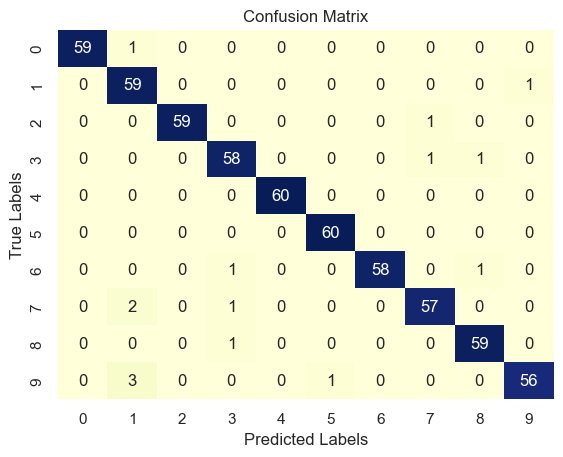

class	  |	Accuracy	Precision	Recall		F1 Score
---------------------------------------------------------------------------
0	  |	1.00		1.00		0.98		0.99
1	  |	0.99		0.91		0.98		0.94
2	  |	1.00		1.00		0.98		0.99
3	  |	0.99		0.95		0.97		0.96
4	  |	1.00		1.00		1.00		1.00
5	  |	1.00		0.98		1.00		0.99
6	  |	1.00		1.00		0.97		0.98
7	  |	0.99		0.97		0.95		0.96
8	  |	0.99		0.97		0.98		0.98
9	  |	0.99		0.98		0.93		0.96


criteria  |	Micro Avg	Macro Avg
--------------------------------------------
Precision |	0.98		0.98
Recall	  |	0.99		0.97
F1 score  |	0.99		0.98


Accuracy: 0.97


In [17]:
# split data
train_data, test_data = split_train_and_test(features, digit_labels)

# train data
print("loading train data...")
hmm_library_models = train_by_hmm_library(train_data, digit_labels, "full")

# test data
print("loading test data...")
real_digit, hmm_library_predictions = test_by_hmm_library(test_data, hmm_library_models, digit_labels)

# confusion matrix
confusion_matrix = get_confusion_matrix(real_digit, hmm_library_predictions, digit_labels)
plot_heatmap(confusion_matrix, digit_labels)
cm_dict["digit_lib"] = confusion_matrix

# evaluating the performance of models
evaluating_performance_of_models(confusion_matrix, digit_labels)

- Evaluation and analysis for Implementation from Scratch:

    In the subsequent phase, we focus on training our Hidden Markov Model (HMM) on the dataset, specifically targeting the variable digitLabel. This process involves the use of an HMM that is implemented from scratch.

    Following the training, we assess the model's performance using the evaluation criteria outlined in the evaluation and analysis section. These criteria include metrics such as accuracy, precision, recall, or the F1 score, which provide a comprehensive view of the model's effectiveness in predicting future observations.

loading train data...
|████████████████████████████████████████| 10/10 [100%]
Complete!
loading test data...
|████████████████████████████████████████| 600/600 [100%]
Complete!


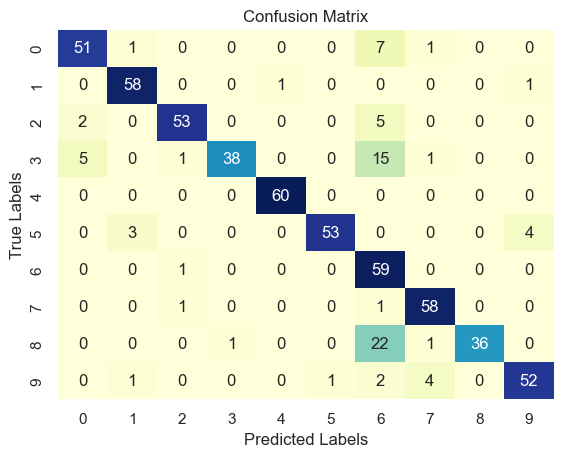

class	  |	Accuracy	Precision	Recall		F1 Score
---------------------------------------------------------------------------
0	  |	0.97		0.88		0.85		0.86
1	  |	0.99		0.92		0.97		0.94
2	  |	0.98		0.95		0.88		0.91
3	  |	0.96		0.97		0.63		0.77
4	  |	1.00		0.98		1.00		0.99
5	  |	0.98		0.98		0.88		0.93
6	  |	0.91		0.53		0.98		0.69
7	  |	0.98		0.89		0.97		0.93
8	  |	0.96		1.00		0.60		0.75
9	  |	0.98		0.91		0.87		0.89


criteria  |	Micro Avg	Macro Avg
--------------------------------------------
Precision |	0.92		0.90
Recall	  |	0.94		0.86
F1 score  |	0.93		0.87


Accuracy: 0.86


In [20]:
# split data
train_data, test_data = split_train_and_test(features, digit_labels)

# train data
print("loading train data...")
hmm_scratch_models = train_by_HMM_scr(train_data, digit_labels, num_hs= 13, num_iter= 10)

# test data
print("loading test data...")
real_digit, hmm_scratch_predictions = test_by_HMM_scr(test_data, hmm_scratch_models, digit_labels)

# confusion matrix
confusion_matrix = get_confusion_matrix(real_digit, hmm_scratch_predictions, digit_labels)
plot_heatmap(confusion_matrix, digit_labels)
cm_dict["digit_scr"] = confusion_matrix


# evaluating the performance of models
evaluating_performance_of_models(confusion_matrix, digit_labels)

---------------------------------

7- Prepare your model to recognize the specified speaker in the audio file (target variable = speakerName). Construct the Confusion Matrix and compute the Accuracy and Precision measures. Subsequently, analyze the derived values?

- Evaluation and analysis for Implementation via Library:

    In the subsequent phase, our focus shifts to training our Hidden Markov Model (HMM) on the dataset, with a specific emphasis on the variable speakerName. This process involves leveraging the `hmmlearn` library, which offers a comprehensive suite of tools for defining, training, and evaluating HMMs.

    Upon completion of the training, we evaluate the model's performance using the criteria outlined in the evaluation and analysis section. These criteria encompass metrics such as accuracy, precision, recall, or the F1 score, providing a comprehensive assessment of the model's effectiveness in predicting future observations.

loading train data...
|████████████████████████████████████████| 6/6 [100%]
Complete!
loading test data...
|████████████████████████████████████████| 600/600 [100%]
Complete!


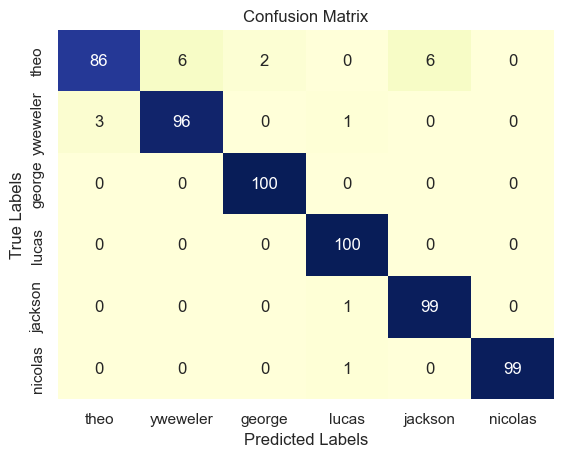

class	  |	Accuracy	Precision	Recall		F1 Score
---------------------------------------------------------------------------
theo	  |	0.97		0.97		0.86		0.91
yweweler  |	0.98		0.94		0.96		0.95
george	  |	1.00		0.98		1.00		0.99
lucas	  |	0.99		0.97		1.00		0.99
jackson	  |	0.99		0.94		0.99		0.97
nicolas	  |	1.00		1.00		0.99		0.99


criteria  |	Micro Avg	Macro Avg
--------------------------------------------
Precision |	0.99		0.97
Recall	  |	0.97		0.97
F1 score  |	0.98		0.97


Accuracy: 0.97


In [18]:
# split data
train_data, test_data = split_train_and_test(speaker_features, speaker_labels)

# train data
print("loading train data...")
hmm_library_models = train_by_hmm_library(train_data, speaker_labels, "tied")

# test data
print("loading test data...")
real_speakers, hmm_library_predictions = test_by_hmm_library(test_data, hmm_library_models, speaker_labels)

# confusion matrix
confusion_matrix = get_confusion_matrix(real_speakers, hmm_library_predictions, speaker_labels)
plot_heatmap(confusion_matrix, speaker_labels)
cm_dict["speaker_lib"] = confusion_matrix

# evaluating the performance of models
evaluating_performance_of_models(confusion_matrix, speaker_labels)

- Evaluation and analysis for Implementation from Scratch:

    In the subsequent phase, our focus shifts to training our Hidden Markov Model (HMM) on the dataset, with a specific emphasis on the variable speakerName. This process involves the use of an HMM that is implemented from scratch.

    Upon completion of the training, we evaluate the model's performance using the criteria outlined in the evaluation and analysis section. These criteria encompass metrics such as accuracy, precision, recall, or the F1 score, providing a comprehensive assessment of the model's effectiveness in predicting future observations.

loading train data...
|████████████████████████████████████████| 6/6 [100%]
Complete!
loading test data...
|████████████████████████████████████████| 600/600 [100%]
Complete!


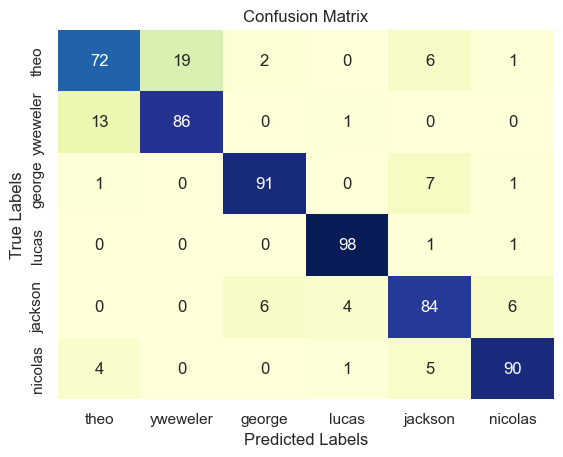

class	  |	Accuracy	Precision	Recall		F1 Score
---------------------------------------------------------------------------
theo	  |	0.92		0.80		0.72		0.76
yweweler  |	0.94		0.82		0.86		0.84
george	  |	0.97		0.92		0.91		0.91
lucas	  |	0.98		0.94		0.98		0.96
jackson	  |	0.94		0.82		0.84		0.83
nicolas	  |	0.96		0.91		0.90		0.90


criteria  |	Micro Avg	Macro Avg
--------------------------------------------
Precision |	0.94		0.87
Recall	  |	0.92		0.87
F1 score  |	0.93		0.87


Accuracy: 0.87


In [19]:
# split data
train_data, test_data = split_train_and_test(speaker_features, speaker_labels)

# train data
print("loading train data...")
hmm_scratch_models = train_by_HMM_scr(train_data, speaker_labels, num_hs= 6, num_iter= 1)

# test data
print("loading test data...")
real_speakers, hmm_scratch_predictions = test_by_HMM_scr(test_data, hmm_scratch_models, speaker_labels)

# confusion matrix
confusion_matrix = get_confusion_matrix(real_speakers, hmm_scratch_predictions, speaker_labels)
plot_heatmap(confusion_matrix, speaker_labels)
cm_dict["speaker_scr"] = confusion_matrix

# evaluating the performance of models
evaluating_performance_of_models(confusion_matrix, speaker_labels)

---------------------------------

8- Compare the outcomes of sections 6 and 7 and determine the reasons behind any discrepancies?

We can expect some discrepancies in the outcomes (accuracy and precision) of sections 6 and 7. The reasons I can highlight include:

- **Speaker Independence of Numbers**: Numbers themselves (0-9) are inherently independent of the speaker. The acoustic features used by an HMM to recognize a specific digit should remain relatively consistent regardless of who utters the number. This makes it potentially easier for the model in section 6 to achieve higher accuracy.

- **Speaker Variability**: Speech patterns and pronunciations can vary significantly between speakers. Accents, vocal fry, and individual speech impediments can make it more challenging for the model in section 7 to differentiate speakers consistently.

-  **Number of Classes**: Section 6 deals with classifying 10 digits (0-9). Section 7 needs to classify 6 speakers. Having fewer classes generally leads to higher accuracy as there are fewer possibilities for the model to confuse.

By analyzing the confusion matrices from both sections, we can gain further insights into specific types of errors the models are making. 

<h1 style = "color:red;text-align: center;font-size:50px"> <b>
    Analyze Outcomes
</b> </h1>

<h1 style = "color:green;font-size:30px" dir = "ltr"> <b>
    Compare Results:
</b> </h1>

The results from the first and second parts of my study varied significantly. Additionally, the model developed using the hmmlearn library outperformed the model I built from scratch, demonstrating higher accuracy.

the superior performance of the model developed using the hmmlearn library over the one I built from scratch, can be attributed to several factors:

- **Additional Preprocessing**: The hmmlearn library may offer additional preprocessing steps for the dataset that extend beyond the initial preprocessing we conducted at the start of the project. These enhanced preprocessing techniques can significantly improve the model's performance. Additionally, the library might introduce preprocessing steps and aggregation techniques to achieve robustness and improve the learning of the HMM model parameters.This could involve using overlapping time windows to learn better state transition probabilities, which can smooth over sensitivities to the specified time resolution and improve the model's ability to capture complex patterns in the data. These advanced preprocessing methods, combined with the library's optimized implementation of Hidden Markov Models (HMMs), contribute to the superior performance of models developed using hmmlearn over those built from scratch.

- **Optimized Implementations**: The hmmlearn library provides a robust and optimized implementation of Hidden Markov Models (HMMs), which are particularly adept at modeling sequential data. This library's implementation is likely enhanced by advanced features and optimizations that contribute to its superior accuracy. Given the computational demands of HMM algorithms, libraries such as hmmlearn utilize efficient numerical libraries and techniques to expedite calculations, thereby offering a more efficient solution for users

- **Established Heuristics**: The hmmlearn library incorporates established heuristics and best practices for training and decoding Hidden Markov Models (HMMs). These heuristics are designed to enhance the model's convergence during training, which can lead to improved results. These algorithms are optimized for efficiency and accuracy, ensuring that the models developed with hmmlearn are not only robust but also capable of capturing complex patterns in sequential data effectively.

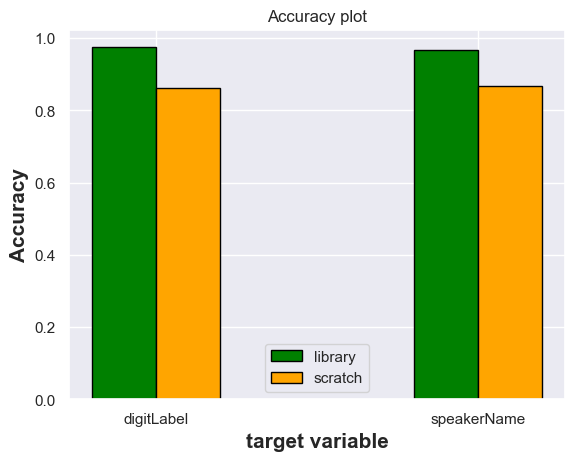

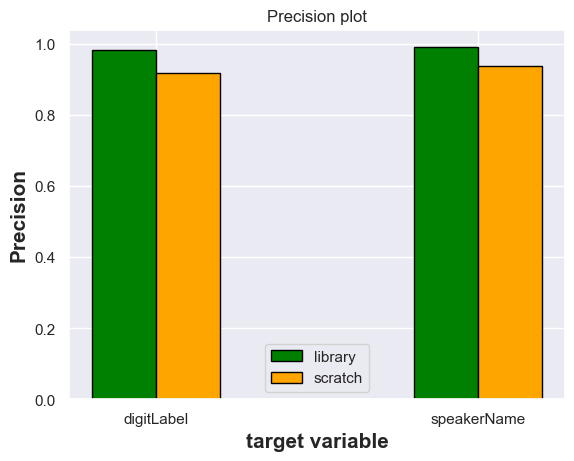

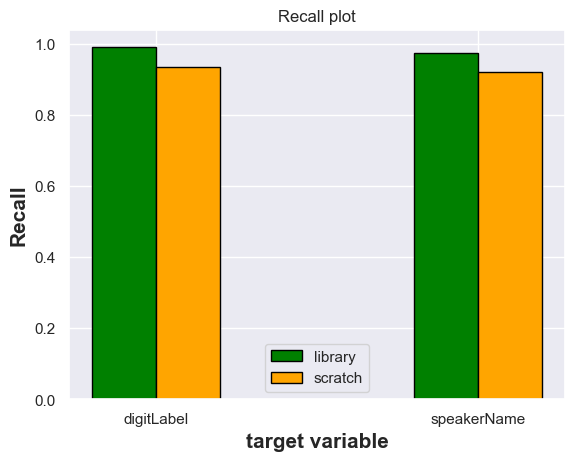

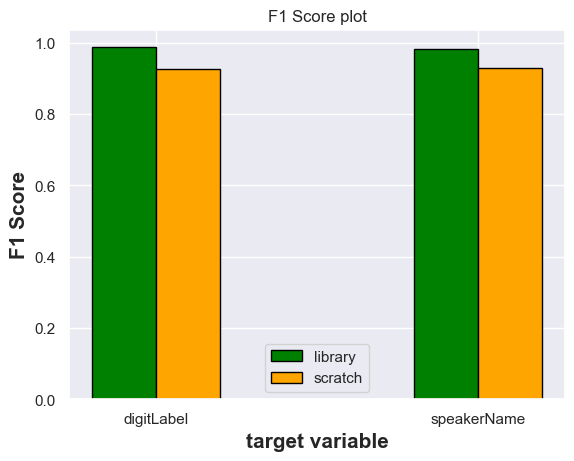

In [21]:
create_bar_plot(cm_dict, calculate_micro_accuracy, "Accuracy")
create_bar_plot(cm_dict, calculate_micro_precision, "Precision")
create_bar_plot(cm_dict, calculate_micro_recall, "Recall")
create_bar_plot(cm_dict, calculate_micro_f1_score, "F1 Score")